In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
train= pd.read_csv("train.csv")
test= pd.read_csv("test.csv")

# Data Visualization

## Overview

In [4]:
train.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admission
0,153,321,112,5,5.0,5.0,9.06,1,0.86,1.0
1,367,320,104,3,3.5,4.5,8.34,1,0.74,1.0
2,40,307,108,2,4.0,3.5,7.70,0,0.48,0.0
3,42,316,105,2,2.5,2.5,8.20,1,0.49,0.0
4,335,312,107,4,4.5,4.0,8.65,1,0.73,1.0


## Correlation Heatmap

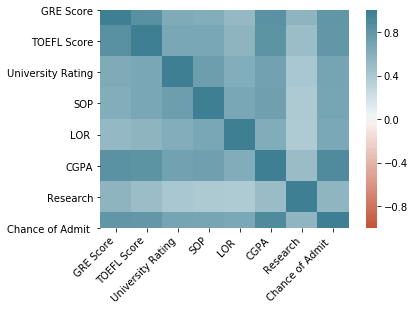

In [5]:
data = train[['GRE Score','TOEFL Score','University Rating', 'SOP','LOR ', 'CGPA', 'Research', 'Chance of Admit ']]
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [6]:
corr

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.837652,0.641584,0.617741,0.530052,0.831782,0.562800,0.801206
TOEFL Score,0.837652,1.000000,0.664569,0.669889,0.562308,0.820676,0.484800,0.796866
University Rating,0.641584,0.664569,1.000000,0.737368,0.618060,0.713836,0.414812,0.688110
SOP,0.617741,0.669889,0.737368,1.000000,0.667767,0.723864,0.396105,0.684358
LOR,0.530052,0.562308,0.618060,0.667767,1.000000,0.638709,0.376800,0.660298
CGPA,0.831782,0.820676,0.713836,0.723864,0.638709,1.000000,0.506440,0.884342
Research,0.562800,0.484800,0.414812,0.396105,0.376800,0.506440,1.000000,0.547672
Chance of Admit,0.801206,0.796866,0.688110,0.684358,0.660298,0.884342,0.547672,1.000000


## Distribution of admission

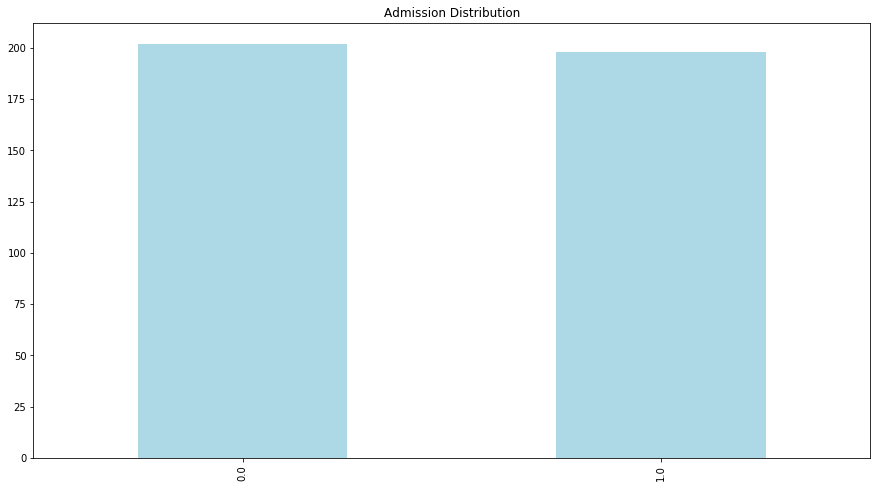

In [7]:
adm = train['Admission']
r = Counter(adm)

adm = pd.DataFrame.from_dict(r, orient = 'index').sort_index()
adm.plot(kind = 'bar', color = 'LightBlue', figsize = (15,8), title = 'Admission Distribution', legend = False)

## Distribution of GRE Score

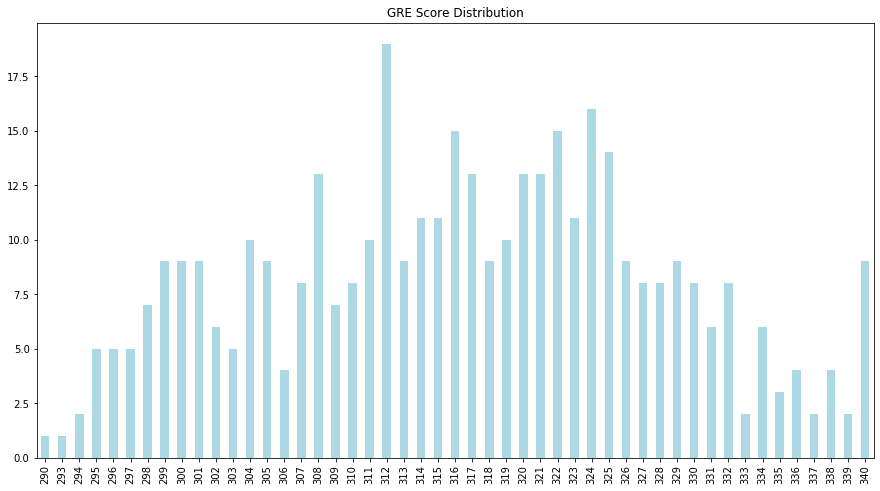

In [8]:
gre = train['GRE Score']
r = Counter(gre)

gre = pd.DataFrame.from_dict(r, orient = 'index').sort_index()
gre.plot(kind = 'bar', color = 'LightBlue', figsize = (15,8), title = 'GRE Score Distribution', legend = False)


## Distribution of TOEFL Score

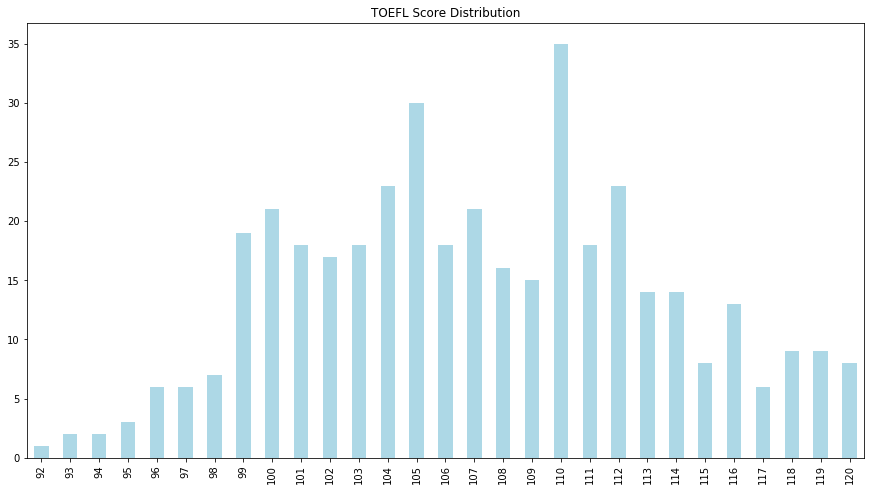

In [9]:
toefl = train['TOEFL Score']
r = Counter(toefl)

toefl = pd.DataFrame.from_dict(r, orient = 'index').sort_index()
toefl.plot(kind = 'bar', color = 'LightBlue', figsize = (15,8), title = 'TOEFL Score Distribution', legend = False)

# Dataloader

In [10]:
class Data(Dataset):
    def __init__(self, file_path):
        self.data_frame = np.array(pd.read_csv(file_path)[['GRE Score','TOEFL Score','University Rating', 'SOP','LOR ', 'CGPA', 'Research', 'Admission']])
    def __len__(self):
        return self.data_frame.shape[0]
    def __getitem__(self, idx):
        feature = torch.tensor(self.data_frame[idx][:-1], dtype=torch.float)
        label = torch.tensor(self.data_frame[idx][-1], dtype=torch.long)
        return feature, label

In [11]:
trainset = Data("train.csv")
trainloader = torch.utils.data.DataLoader(trainset, batch_size=3, shuffle=True, num_workers=1)

In [12]:
testset = Data("test.csv")
testloader = torch.utils.data.DataLoader(testset, batch_size=3, shuffle=False, num_workers=1)

# Model

In [31]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(7, 4)
        self.fc2 = nn.Linear(4, 4)
        self.fc3 = nn.Linear(4, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()

# Training

In [32]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [33]:
for epoch in range(20):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0
print('Finished Training')

[1,   100] loss: 0.789
[2,   100] loss: 0.706
[3,   100] loss: 0.701
[4,   100] loss: 0.700
[5,   100] loss: 0.697
[6,   100] loss: 0.696
[7,   100] loss: 0.697
[8,   100] loss: 0.689
[9,   100] loss: 0.683
[10,   100] loss: 0.680
[11,   100] loss: 0.651
[12,   100] loss: 0.576
[13,   100] loss: 0.545
[14,   100] loss: 0.516
[15,   100] loss: 0.500
[16,   100] loss: 0.456
[17,   100] loss: 0.445
[18,   100] loss: 0.490
[19,   100] loss: 0.469
[20,   100] loss: 0.452
Finished Training


# Testing

In [34]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 100 test images: %d%%' % ( 100*correct / total))

Accuracy of the network on the 100 test images: 78%
